##              Real-World Energy Harvesting 


###        PROBLEM STATEMENT

Estimate the total energy that can be harvested from human footsteps in crowded areas (e.g., metro stations, malls, universities) and assess its contribution toward sustainable smart-city energy solutions.

### Importing Required Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import os
import datetime as dt

### Dataset Overview

#### Dataset Details -1
* **Dataset Name** :**Footstep Power Generation Tile Data**
* **Source** : https://www.kaggle.com/datasets/ishanshrivastava28/footstep-power-generation-tile-data
* **File Format** : .csv

#### Dataset Description
The Footstep Power Generation Tile data contains 3 numerical features voltage(V),current(mA),and weight(kgs).1 categorical feature that is the step location of the person on the square tile-center,edge,corner.It also contains the null values,Null values are occurred due to loose connections of sensors.

#### Feature Description
* **Time_sec**:The Timestamp since the start of the measurement
* **Pedal_RPM**:Revolution per minute of the Pedal
* **Torque_Nm**:Mechanical torque applied to the Pedal
* **Voltage_V**:Voltage generated by the pedal power generator
* **Current_A**:Electric current generated
* **Power_W**:Electrical power output of the system



#### Loading the Dataset

In [2]:
powergenerated=pd.read_csv('pedal_power_dataset.csv')

#### Explore and Understand the Data

In [3]:
powergenerated.head(10)

,Time_sec,Pedal_RPM,Torque_Nm,Voltage_V,Current_A,Power_W
0,1,78,2.20,9.90,1.66,16.43
1,2,91,2.39,12.70,2.34,29.72
2,3,68,2.76,8.26,0.67,5.53
3,4,54,2.25,7.66,2.25,17.24
4,5,82,1.59,6.73,1.60,10.77
5,6,47,1.21,9.85,0.83,8.18
6,7,60,1.91,12.20,1.32,16.10
7,8,78,1.44,6.52,2.06,13.43
8,9,97,1.83,14.24,1.46,20.79
9,10,58,2.77,9.98,2.47,24.65


In [4]:
powergenerated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time_sec   200 non-null    int64  
 1   Pedal_RPM  200 non-null    int64  
 2   Torque_Nm  200 non-null    float64
 3   Voltage_V  200 non-null    float64
 4   Current_A  200 non-null    float64
 5   Power_W    200 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 9.5 KB


In [5]:
powergenerated.describe()

,Time_sec,Pedal_RPM,Torque_Nm,Voltage_V,Current_A,Power_W
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,69.32500,1.997600,10.488100,1.509150,15.845850
std,57.879185,17.39027,0.567613,2.580004,0.564064,7.281839
min,1.000000,40.00000,1.000000,6.140000,0.510000,3.450000
25%,50.750000,54.00000,1.537500,8.275000,1.047500,10.185000
50%,100.500000,68.50000,1.955000,10.390000,1.570000,14.910000
75%,150.250000,83.00000,2.422500,12.592500,1.970000,20.322500
max,200.000000,99.00000,3.000000,14.960000,2.490000,35.530000


In [6]:
powergenerated.isnull()

,Time_sec,Pedal_RPM,Torque_Nm,Voltage_V,Current_A,Power_W
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
195,False,False,False,False,False,False
196,False,False,False,False,False,False
197,False,False,False,False,False,False
198,False,False,False,False,False,False


In [13]:
powergenerated.sum()

Time_sec     20100.00
Pedal_RPM    13865.00
Torque_Nm      399.52
Voltage_V     2097.62
Current_A      301.83
Power_W       3169.17
dtype: float64

### HEATMAP

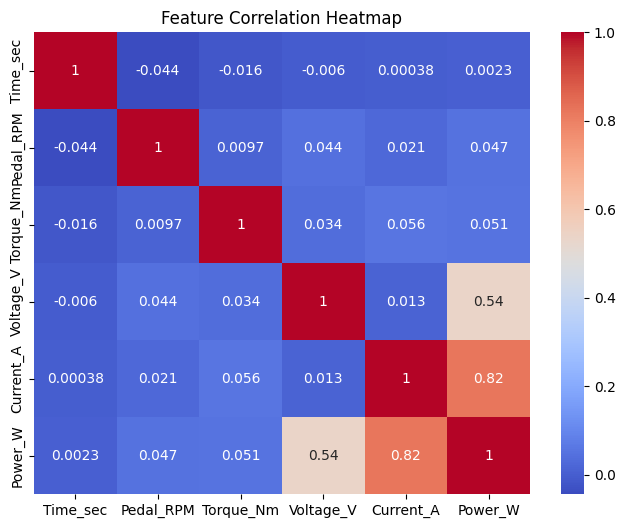

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(powergenerated.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


#### Feature Selection

In [22]:
X =powergenerated[['Pedal_RPM', 'Torque_Nm', 'Voltage_V', 'Current_A']]  
Y = powergenerated['Power_W']  


#### Data Splitting
Data Splitting for the Training and Testing Purpose.

In [23]:
print(X.head())

   Pedal_RPM  Torque_Nm  Voltage_V  Current_A
0         78       2.20       9.90       1.66
1         91       2.39      12.70       2.34
2         68       2.76       8.26       0.67
3         54       2.25       7.66       2.25
4         82       1.59       6.73       1.60


In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


#### Model Selection and Model Building

### LinearRegression
Here we are applying the Linear Regression Model. The important key notes for using Linear Regression is as follows. Simplicity & Interpretability,
Fast Computation, Captures Linear Relationships and It's a Baseline Model.

In [28]:
model = LinearRegression()
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
Y_pred = model.predict(X_test)


In [30]:
Y_pred

array([13.74235794,  6.83498532, 14.1360667 , 23.49907547, 12.79786469,
       28.00055315, 18.14390096,  0.83060746, 25.18683584, 27.92537395,
       20.3954028 ,  7.22277503, 25.68505207, 13.87108714, 17.70057781,
       20.95125412, 23.00684196, 15.52440752,  3.96425032, 20.74092754,
       10.5114285 ,  8.15382308, 25.13349113,  5.83539891, 22.10469001,
       12.82829182, 14.96873129, 17.41289743, 22.45090723, 24.02064485,
       25.15626464,  8.74304218, 19.77046807, 16.33535835, 14.06495632,
       15.89654403,  6.56364234, 16.49508425, -0.54940945, 18.82657782])

#### Applying Evaluation Metrics to check model's performance

In [33]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 2.0063974072702457
R² Score: 0.9631890153254314


#### Visualize Predictions

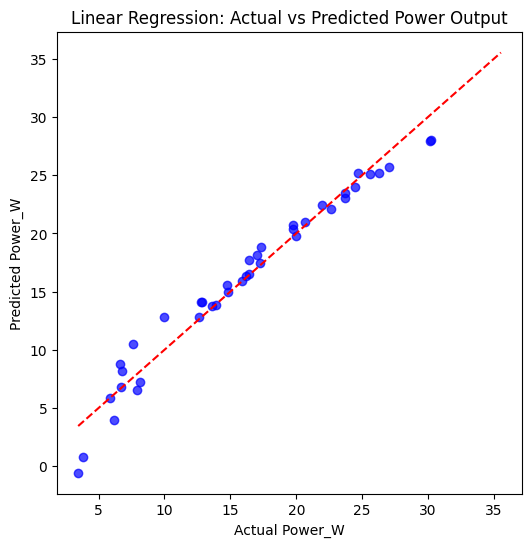

In [35]:
plt.figure(figsize=(6,6))
plt.scatter(Y_test, Y_pred, alpha=0.7, color="blue")
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], "r--")  
plt.xlabel("Actual Power_W")
plt.ylabel("Predicted Power_W")
plt.title("Linear Regression: Actual vs Predicted Power Output")
plt.show()


### RandomForestRegressor
Here we are applying the RandomForestRegression Model. The important key notes for using RandomForestRegression is as follows. Handles non-linearity, more accurate, less sensitive to noise.

In [36]:
model = RandomForestRegressor()
model.fit(X_train, Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
Y_pred = model.predict(X_test)

In [38]:
Y_pred

array([13.5624,  6.9184, 12.7106, 23.0038,  8.9607, 28.1313, 17.4159,
        4.6074, 27.0758, 28.5312, 18.7963,  7.6345, 25.2881, 13.813 ,
       17.0813, 19.3035, 23.5264, 14.9817,  5.7226, 18.7182,  8.8167,
        7.2125, 24.0405,  7.0424, 21.9055, 12.7186, 15.4121, 17.2554,
       21.4474, 24.036 , 22.6707,  8.3925, 20.3654, 16.4103, 12.5702,
       15.8513,  9.0956, 16.6835,  4.3507, 16.4664])

#### Applying Evaluation Metrics to check model's performance

In [39]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 0.8768978190000032
R² Score: 0.9839117255338319


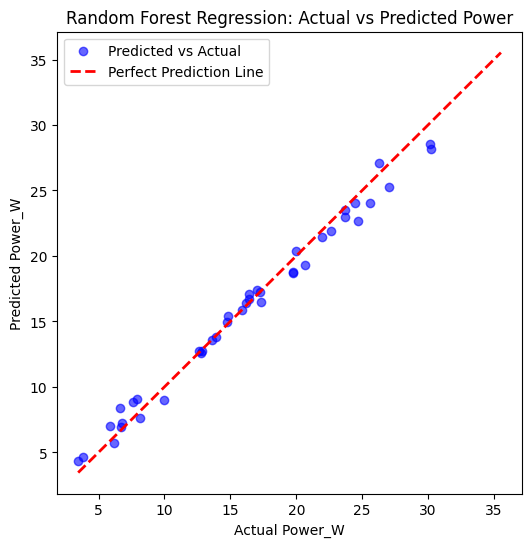

In [44]:
plt.figure(figsize=(6,6))
plt.scatter(Y_test,Y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], "r--", lw=2, label="Perfect Prediction Line")
plt.xlabel("Actual Power_W")
plt.ylabel("Predicted Power_W")
plt.title("Random Forest Regression: Actual vs Predicted Power")
plt.legend()
plt.show()

### Compare of the Models
By the Visualization I Predict that the RandomForestRegression is the Perfect for the dataset. We Initially applied Linear Regression (LR) as a baseline model because of its simplicity and interpretability. Linear Regression assumes a straight-line relationship between features (Pedal RPM, Torque, Voltage, Current) and the target (Power_W).

After  We Implementing the RandomForestRegression we can combine the multiple decision trees.Random Forest achieved a higher R² score and lower Mean Squared Error (MSE), proving to be more accurate for predicting pedal-powered electricity generation.